In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import astropy.units as u

In [3]:
from density import full_density_profile
from ifront_guess import ionisation_fraction_plot, ionisation_front, parker_critical

### Constants

In [5]:
from astropy.constants import M_sun, R as R_gas, G, k_B, h, c, m_p, sigma_T, sigma_sb
k = 1e-2 * u.cm**2/u.g # opacity
alpha_B = 2.6e-13 * (u.cm**3)/u.s # cm3s-1 at (T = 10^4 K) From Owen and Alvarez 2016

### Parameters

In [6]:
# Parameter list
T_H = 3500 * u.K # temperature in hydrostatic region
T_P= 1e4 * u.K # temperature in parker wind region

mu_H = 1 * u.g / u.mol # mean molecular weight in units of hydrogen mass
mu_P = mu_H/2

m_dot = 0.5

M_s = 1*M_sun
M_BH = 4e6 * M_sun
R_s = 0.5 * u.astronomical_unit
d = 0.05 * u.parsec
a_H = np.sqrt(R_gas*T_H/mu_H)
a_P = np.sqrt(R_gas*T_P/mu_P)

H = a_P**2/(G*M_s/R_s**2) # scale height
rho_s = 1/(k*H) # density at photosphere

In [7]:
r_I = ionisation_front(m_dot, M_s, M_BH, R_s, a_H, a_P, d)
R_c = parker_critical(a_P, M_s).to(u.astronomical_unit)
print(r_I, R_c)

/Users/jacopouggeri/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:611: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/jacopouggeri/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:611: RuntimeWarning: overflow encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


0.21740953032607996 2.667423945872125 AU


## Plot of stellar setup
- Ionisation fraction with distance
- Density profile with ionisation front


NameError: name 'r_I' is not defined

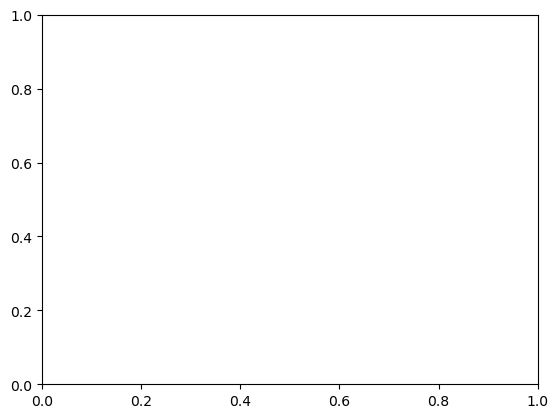

In [ ]:
fig, ax = plt.subplots()

# Get ionisation fraction
r, X = ionisation_fraction_plot(r_I, M_s, M_BH, m_dot, R_s, a_H, a_P, d)
# Plot ionisation fraction
ax.plot(r*R_c, X - 1e-4, color="red") 

# set x-axis label
ax.set_xlabel("Radius (AU)", fontsize = 14)
# set y-axis label
ax.set_ylabel(r"$X - 10^{-4}$", fontsize=14)
ax.set_yscale("log")
ax.set_xscale("log")

# Get second axis
ax2 = ax.twinx()
# Get density profile
r_s = (R_s/R_c).value
r = np.logspace(np.log10(r_s), 1, 10000)
rho = full_density_profile(r, r_I, R_s, M_s, rho_s, a_H, a_P).to(u.g/(u.cm**3))
# Plot density profile
ax2.plot(r*R_c, rho)

# set 2nd y-axis label
ax2.set_ylabel(r"$\rho$ (g/cm3)", fontsize=14)
ax2.set_yscale("log")

ax.set_xlim(r_s*R_c.value, 1.1*R_c.value)
plt.grid()

#loc = ticker.MultipleLocator(base=1.1) # this locator puts ticks at regular intervals
#ax.xaxis.set_major_locator(loc)
plt.savefig("figures/mainplot.svg")
plt.show()



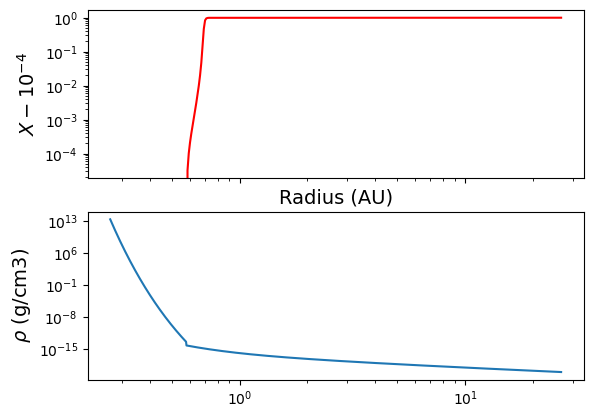

In [ ]:
fig, (ax, ax2) = plt.subplots(2, sharex='col', sharey='row')

# Get ionisation fraction
r, X = ionisation_fraction_plot(r_I, M_s, M_BH, m_dot, R_s, a_H, a_P, d)
# Plot ionisation fraction
ax.plot(r*R_c, X - 1e-4, color="red") 

# set x-axis label
ax.set_xlabel("Radius (AU)", fontsize = 14)
# set y-axis label
ax.set_ylabel(r"$X - 10^{-4}$", fontsize=14)
ax.set_yscale("log")
ax.set_xscale("log")

# Get second axis
# Get density profile
r = np.logspace(-1, 1, 1000)
rho = full_density_profile(r, r_I, R_s, M_s, rho_s, a_H, a_P).to(u.g/(u.cm**3))
# Plot density profile
ax2.plot(r*R_c, rho)

# set 2nd y-axis label
ax2.set_ylabel(r"$\rho$ (g/cm3)", fontsize=14)
ax2.set_yscale("log")

#loc = ticker.MultipleLocator(base=1.1) # this locator puts ticks at regular intervals
#ax.xaxis.set_major_locator(loc)
plt.show()

In [ ]:
from EUV_flux import disk_spectrum, T_eff

In [ ]:
# Tunable parameters 
m_dot = 1 # black hole accretion rate as fraction of Eddington accretion rate
M_BH = 4e6 * M_sun # mass of black hole as multiple of solar mass
print("M:", M_BH)

# Useful values
R_s = 2*G*M_BH/(c**2) # Schwarschild radius 
R_in = 3*R_s # innermost stable orbit (approximate)
print("R_in:", R_in)

M_dot_edd = 8*np.pi*R_in*m_p*c/sigma_T # accretion rate at Eddington limit
M_dot = m_dot*M_dot_edd # black hole accretion rate for chosen value of m_dot
print("M_dot:", M_dot)

# Temperature scale parameter for temperature distribution of accretion disk
T_s = (3*G*M_BH*M_dot/(8*np.pi*sigma_sb*(R_in**3)))**(1./4.)
print("T_s:", T_s.to("K"))

M: 7.953639482792203e+36 kg
R_in: 35439000913.20299 m
M_dot: 6.713633485534001e+21 kg / s
T_s: 640750.0158617214 K


/Users/jacopouggeri/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:611: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/jacopouggeri/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:611: RuntimeWarning: overflow encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


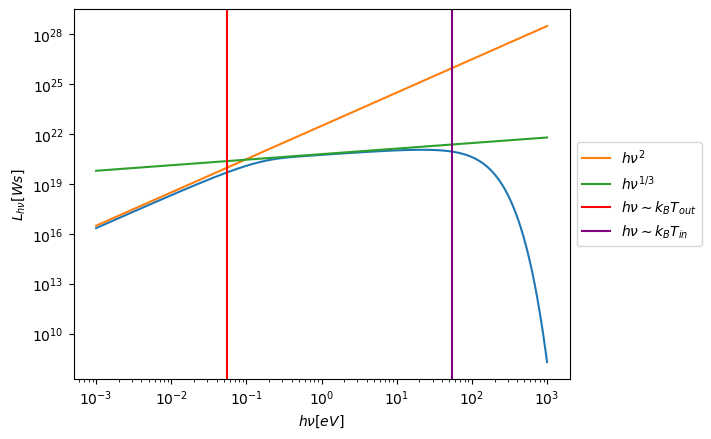

In [ ]:
r_lim = 1e4 # Plot radius limit

L_nu, nu = disk_spectrum(m_dot, M_BH, nu_start = 1e-3)

hnu = (h*nu).to("eV")

plt.loglog(hnu, L_nu.to("W*s"))

plt.plot(hnu, (10**(22.5)*hnu**(2)), label = r"$h\nu^{2}$")
plt.plot(hnu, (10**(20.8)*hnu**(1/3)), label = r"$h\nu^{1/3}$")

plt.axvline((k_B*T_eff(r_lim, T_s)).to("eV").value, color="red", label=r"$h\nu \sim k_B T_{out}$")
plt.axvline((k_B*T_s).to("eV").value, color="purple", label=r"$h\nu \sim k_B T_{in}$")

plt.xlabel(r"$h\nu [eV]$")
plt.ylabel(r"$L_{h\nu}[Ws]$")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.xlim(1e-5, 3e2)

## Evaporation timescale plot

In [8]:
n = 1
r_list = np.tensordot(np.loadtxt("data/radiai_list%i.txt" %(n)), np.ones(3), axes = 0)
mass_list = np.tensordot(np.tensordot(np.loadtxt("data/mass_list%i.txt" %(n)), np.ones(len(r_list[0, :])), axes=0), np.ones(3), axes = 0)
m_loss_list = np.load("data/m_loss_list%i.npy" %(n))
m_dot_list = np.loadtxt("data/m_dot_list%i.txt" %(n))
params = np.load("data/params%i.npy" %(n), allow_pickle=True)

In [9]:
def evaporation_timescale(M_dot, m):
    return m/M_dot * u.a

In [10]:
t_e = evaporation_timescale(m_loss_list, mass_list)
print(t_e.shape)

(15, 16, 3)


<Figure size 640x480 with 0 Axes>

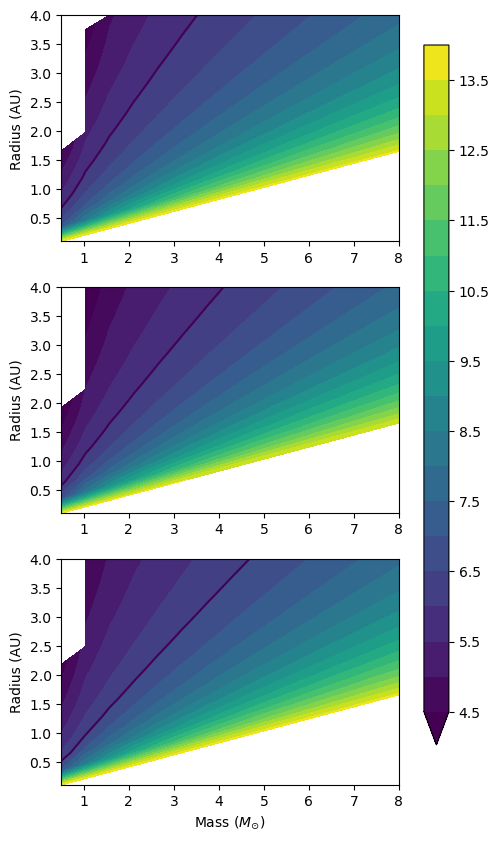

In [11]:
def plot_result(cmap = "viridis", n = 3):
    N = len(r_list)

    fig = plt.figure()

    fig, axes = plt.subplots(nrows=len(m_dot_list), ncols=1, figsize=(5, 10))

    for i, ax in enumerate(axes.flat):
        X = mass_list[:, :, i]
        Y = r_list[:, :, i]
        Z = t_e[:, :, i].value

        im = ax.contourf(X, Y, np.log10(Z), levels=20, cmap=cmap, extend="min")

        ax.contour(X, Y, np.log10(Z), levels = [np.log10(3e6)])

        ax.set_ylabel("Radius (AU)")

    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    fig.colorbar(im, cax=cbar_ax)
    ax.set_xlabel(r"Mass $(M_{\odot}$)")

plot_result()

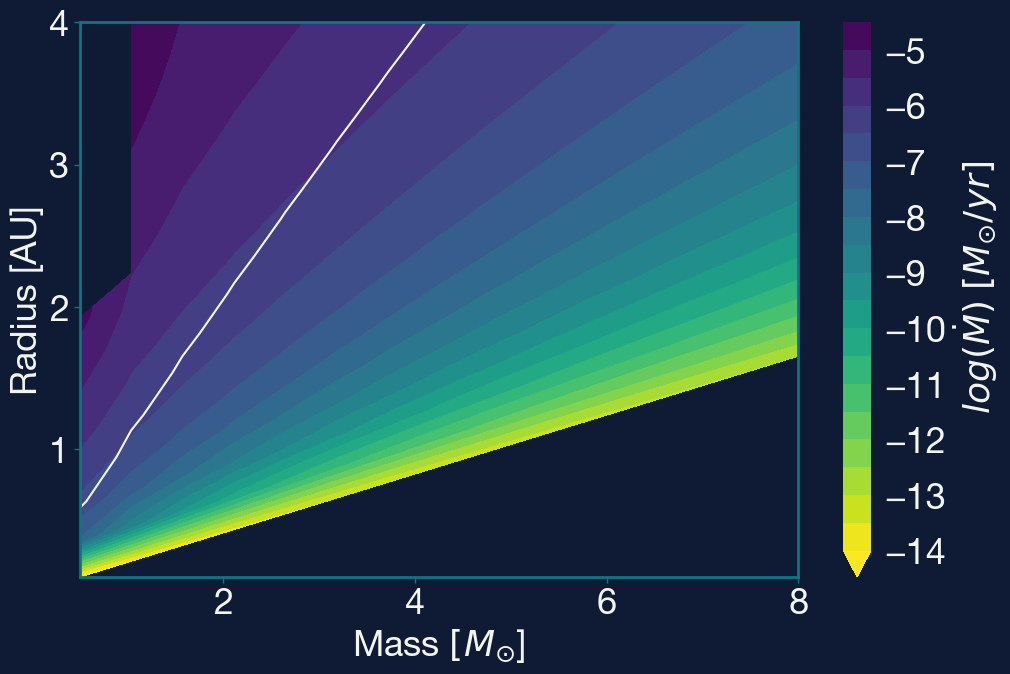

In [54]:
def plot_result_single(cmap = plt.cm.get_cmap("viridis"), n = 1):
    mm = 1/25.4
    W = 338. * mm
    H = 183 * mm
    fig, ax = plt.subplots(1, ncols=1, figsize=(W, H))

    X = mass_list[:, :, n]
    Y = r_list[:, :, n]
    Z1 = m_loss_list[:, :, n]
    Z2 = t_e[:, :, n].value

    im = ax.contourf(X, Y, np.log10(Z1), levels=20, cmap=cmap.reversed(), extend="min")

    ax.contour(X, Y, np.log10(Z2), levels = [np.log10(3e6)])

    ticks = [-5, -6, -7, -8, -9, -10, -11, -12, -13, -14]

    ax.set_ylabel("Radius [AU]")

    fig.subplots_adjust(right=0.8)
    cbar = fig.colorbar(im)
    cbar.set_label(r"$log(\dotM)$ $[M_{\odot}/yr]$")
    cbar.set_ticks(ticks)
    ax.set_xlabel(r"Mass $[M_{\odot}$]")
    
    cbar.outline.set_edgecolor('none')
    # Remove the color bar ticks while leaving the tick labels
    cbar.ax.tick_params(axis='y', width=0, length=6, labelsize=26)

plot_result_single()
plt.show()
plt.close()

In [13]:
import seaborn as sns
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, to_rgb
from cycler import cycler

In [14]:
hex_list = [
    "#f3f6f0",
    "#ffac08",
    "#f87a2c",
    "#f24f4a",
    "#833640",
    "#342339"
]

dark_blue = '#0f1b35'
light_blue = '#1eb7d7'
blue = '#0d7685'
silver = "#f3f6f0"
yellow = "#ffac08"
red = "#f24f4a"

my_palette = sns.color_palette(hex_list)
#my_cmap = ListedColormap(sns.color_palette(my_palette,256)) 

In [15]:
def hex_to_rgb(hex_list):
    rgb_list = []
    for i, val in enumerate(hex_list):
        rgb_val = to_rgb(val)
        rgb_list.append(rgb_val)
    return rgb_list

In [16]:
colors = hex_to_rgb(hex_list)
nc = len(colors)
c = np.zeros((3, nc, 3))
rgb = ['red', 'green', 'blue']
for idx, e in enumerate(colors):
    for ii in range(3):
        c[ii, idx, :] = [float(idx) / float(nc - 1), e[ii], e[ii]]

cdict = dict(zip(rgb, c))
my_cmap = LinearSegmentedColormap('mycmap', cdict)
# to change default colormap
color_cycler = cycler(color=my_cmap(np.linspace(1, 0, 4)))

plt.rcParams['axes.prop_cycle'] = plt.cycler(color_cycler)
plt.rcParams['image.cmap'] = my_cmap
plt.rcParams['axes.grid'] = False
plt.rcParams['font.family'] = ['Helvetica Neue']


params = {
    'text.color': silver,
    'axes.edgecolor': blue,
    'font.size': 26,
    'axes.facecolor': (0.058823529411764705, 0.10588235294117647, 0.20784313725490197, 0),
    'figure.facecolor': dark_blue,
    'savefig.facecolor': (0.058823529411764705, 0.10588235294117647, 0.20784313725490197, 0),
    'axes.labelcolor': silver,
    'xtick.color': blue,
    'ytick.color': blue,
    'xtick.labelcolor': silver,
    'ytick.labelcolor': silver,
    'xtick.direction': 'out',  # set the direction of the ticks to 'out'
    'ytick.direction': 'out',
    'xtick.major.size': 4,  # set the size of the major tick markers
    'ytick.major.size': 4,
    'xtick.minor.size': 2,  # set the size of the minor tick markers
    'ytick.minor.size': 2,
    'xtick.major.width': 1,  # set the width of the major tick markers
    'ytick.major.width': 1,
    'xtick.minor.width': 1,  # set the width of the minor tick markers
    'ytick.minor.width': 1,
    'axes.linewidth': 2,
    'legend.frameon': 'False',
    'axes.grid': False,
    'grid.color': blue,
    'axes.grid.axis': 'y',
}

plt.rcParams.update(params)


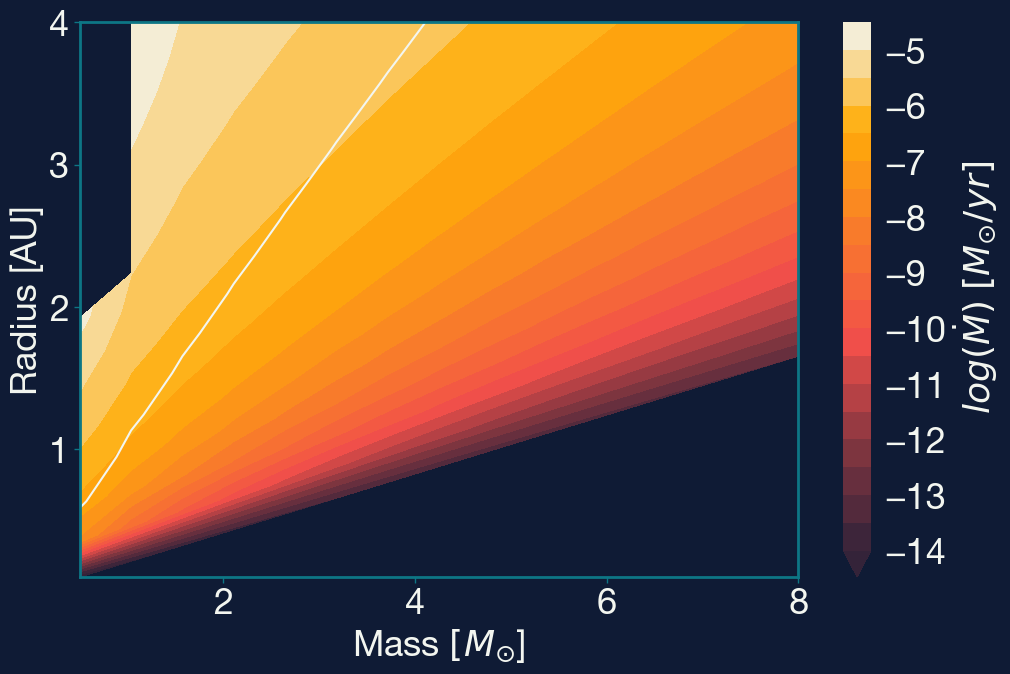

In [55]:
plot_result_single(my_cmap)
mm = 1/25.4
plt.savefig("figures/etime.svg")

(15,) (15, 16)


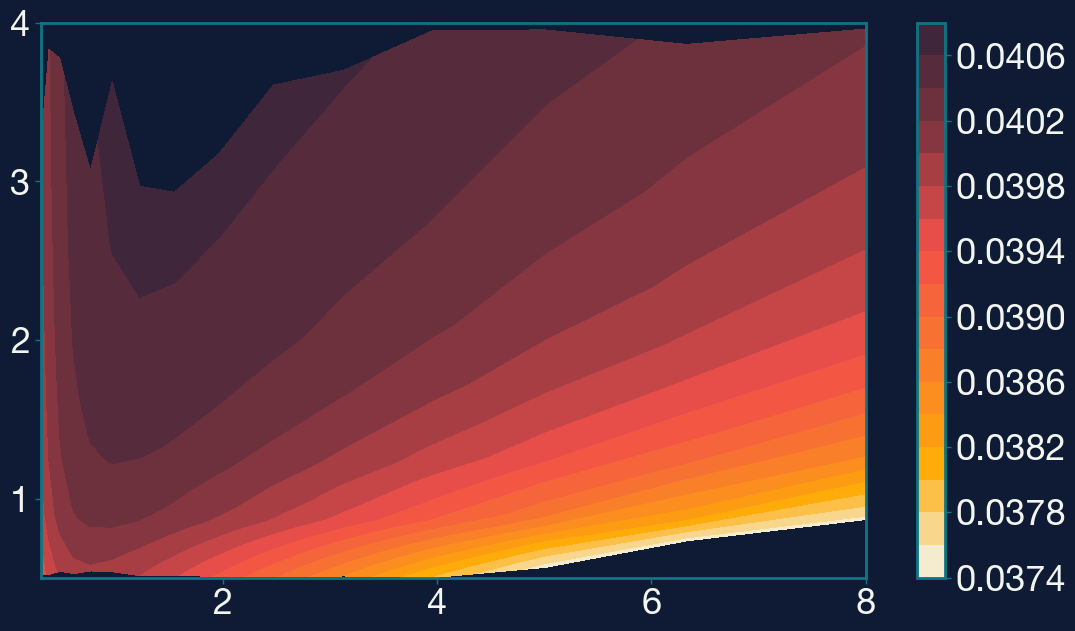

In [21]:
M_o_range = np.loadtxt("data/M_o_range1.txt") * u.solMass
M_s_range = np.loadtxt("data/M_s_range1.txt") * u.solMass
print(M_s_range.shape, M_o_range.shape)
M_s_range_2 = np.tensordot(M_s_range.value, np.ones(len(M_o_range[0])), axes = 0)
R_s_range = interp_radius(M_s_range_2, M_o_range)

W = 338. * mm
H = 183 * mm
fig, ax = plt.subplots(1, ncols=1, figsize=(W, H))
plt.contourf(M_s_range_2, R_s_range, M_o_range, levels=20)

plt.xticks([2, 4, 6, 8])
plt.yticks([1, 2, 3, 4])
plt.colorbar()

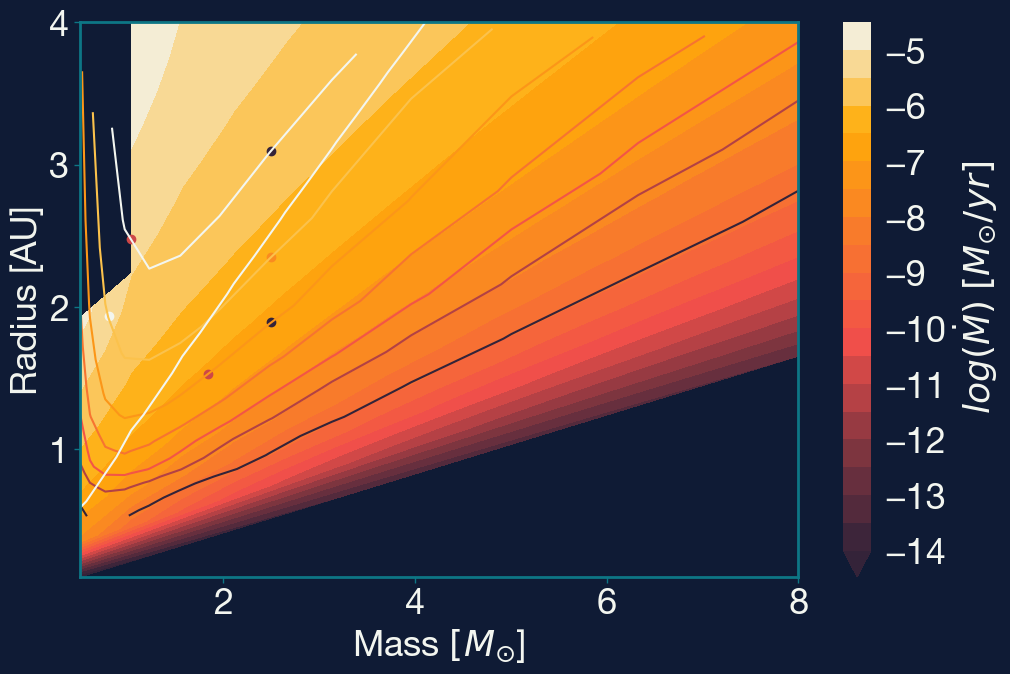

In [67]:
mm = 1/25.4
W = 338 * mm
H = 183 * mm
fig, ax = plt.subplots(1, ncols=1, figsize=(W, H))

cmap = my_cmap

X = mass_list[:, :, n]
Y = r_list[:, :, n]
Z1 = m_loss_list[:, :, n]
Z2 = t_e[:, :, n].value

im = ax.contourf(X, Y, np.log10(Z1), levels=20, cmap=cmap.reversed(), extend="min")

core_contour = ax.contour(M_s_range_2, R_s_range, M_o_range, levels=[0.0399, 0.0401, 0.0402, 0.0403, 0.0404, 0.0405, 0.0406], cmap=cmap.reversed())

#ax.clabel(core_contour, inline=True, fontsize="x-small", fmt='%1.4f')

ax.contour(X, Y, np.log10(Z2), levels = [np.log10(3e6)])

ticks = [-5, -6, -7, -8, -9, -10, -11, -12, -13, -14]

ax.set_ylabel("Radius [AU]")

fig.subplots_adjust(right=0.8)
cbar = fig.colorbar(im)
cbar.set_label(r"$log(\dotM)$ $[M_{\odot}/yr]$")
cbar.set_ticks(ticks)
ax.set_xlabel(r"Mass $[M_{\odot}$]")

plt.xlim(0.5)

cbar.outline.set_edgecolor('none')
# Remove the color bar ticks while leaving the tick labels
cbar.ax.tick_params(axis='y', width=0, length=6, labelsize=26)

pt_list = [[2.5, 1.8922153822761854],
           [1.8437250310449491, 1.532466646672162],
           [2.5, 2.3521235672608265],
           [0.8050570361297344, 1.9387001568772166],
           [2.5, 3.0986954849888226],
           [1.0351989073792593, 2.4745329379408645]]

for x, y in pt_list:
    ax.scatter(x, y)

plt.savefig("figures/evo.svg", bbox_inches='tight')

In [71]:
r_lim = 1e4 # Plot radius limit

plt.rcParams.update({
    'axes.spines.bottom': True,
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.grid': True,
    'grid.color': blue,
    'axes.grid.axis': 'y',
    'axes.ymargin': 0,
    'axes.xmargin': 0,
})

L_nu, nu = disk_spectrum(m_dot, M_BH, nu_start = 1e-3)

hnu = (h*nu).to("eV")

ratio = 1/np.sqrt(1.5)
mm = 1/25.4
W = 223.24*mm
H = 195.106*mm
fig, ax = plt.subplots(1, ncols=1, figsize=(W, H))

plt.loglog(hnu, L_nu.to("W*s"), color = hex_list[0], label=r"$L_{h\nu}$")

plt.plot(hnu, (10**(22.5)*hnu**(2)), label = r"$h\nu^{2}$", color = hex_list[3])
plt.plot(hnu, (10**(20.8)*hnu**(1/3)), label = r"$h\nu^{1/3}$", color = hex_list[2])

#plt.axvline((k_B*T_eff(r_lim, T_s)).to("eV").value, label=r"$h\nu \sim k_B T_{out}$", color=blue)
#plt.axvline((k_B*T_s).to("eV").value, label=r"$h\nu \sim k_B T_{in}$", color=blue)
plt.axvline((13.6 * u.eV).value, color=silver)

plt.xlabel(r"$h\nu \quad [eV]$")
plt.ylabel(r"$L_{h\nu}\quad [Ws]$")
plt.legend(loc='lower center', bbox_to_anchor=(0.55, 0.1), )

plt.grid(True, which="both")

#plt.xlim(1e-5, 3e2)
plt.savefig("figures/flux.svg", bbox_inches='tight')

NameError: name 'disk_spectrum' is not defined

### Plot stellar surface density
Data from https://www.aanda.org/articles/aa/pdf/2018/01/aa30452-17.pdf

In [72]:
fitx, fity = np.loadtxt("figures/imgdata/Fit.csv", delimiter=",").T
redx, redy = np.loadtxt("figures/imgdata/Red Giants.csv", delimiter=",").T
mainx, mainy = np.loadtxt("figures/imgdata/MS.csv", delimiter=",").T

0.03908767161171558 0.786180718043869


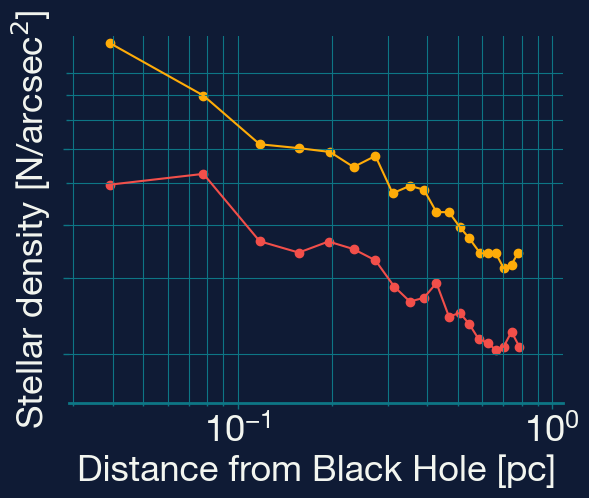

In [77]:
maxv = np.max(fity)
fity /= maxv
redy /= maxv
mainy /= maxv

mm = 1/25.4
W = 162*mm
H = 121*mm
fig, ax = plt.subplots(1, ncols=1, figsize=(W, H))

#plt.plot(fitx, fity, color=silver)


ax.plot(redx, redy, color=red)
ax.scatter(redx, redy, color=red)

ax.plot(mainx, mainy, color=yellow)
ax.scatter(mainx, mainy, color=yellow)

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(redx[0] - 0.01 , redx[-1] + 0.3)
print(redx[0], redx[-1])
ax.set_ylim(np.min(redy) - 0.05, 1.1)

ax.grid(True, which="both")

ax.set_xlabel("Distance from Black Hole [arcsec]")
ax.set_ylabel(r"Stellar density [N/arcsec$^2$]")

ax.set_yticks([0.2, 0.3, 0.4, 0.6])
ax.set_yticklabels([])

ax.set_xticks([0.1, 1])

plt.savefig("figures/dist.svg")